# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

데이터 살펴보기

In [ ]:
# pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 6.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


 - 분석전 혹시모를 상황에 대비해 데이터의 원본을 따로 copy해서 저장해 두고 시작한다.

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/토이프로젝트_0421/BostonHousing.xls')
df_copy = df.copy()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

 - 데이터 포함된 결측값 개수 확인해보기

In [ ]:
df = df_copy

In [ ]:
df.isnull().sum(axis=0)

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

결과 : 각 column 모두 결측값이 없음을 알 수 있다.

 - 데이터 타입 확인하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


결과 : CHAS, RAD, TAX, CAT.MEDV 4개의 columns는 dtype이 int64, 나머지는 float64인것을 info() method를 통해 확인 할 수 있다. 또한 여기서도 'Non-Null Count'를 통해 모든 columns의 데이터에 결측값이 없음을 재차 확인 가능하다. 전체적으로 총 15개의 column과 506개의 행으로 구성된 데이터임을 알 수 있다.

 - CHAS, RAD, CAT.MEDV는 범주형 데이터 나머지는 수치형 데이터로 추정되는데 해당 사실을 확인해 보자.

In [ ]:
print(f'찰스강 접근성 데이터\n{df.CHAS.value_counts()}\n')
print(f'고속도로 접근성 지수\n{df.RAD.value_counts()}\n')
print(f'본인 소유 주택가격 범주화 데이터\n{df["CAT. MEDV"].value_counts()}\n')

찰스강 접근성 데이터
0    471
1     35
Name: CHAS, dtype: int64

고속도로 접근성 지수
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

본인 소유 주택가격 범주화 데이터
0    422
1     84
Name: CAT. MEDV, dtype: int64



결과 : CHAS, CAT.MEDV는 0, 1 두가지로 이분화된 범주형 데이터, RAD의 경우 9가지로 구분된 범주화 데이터 임을 알 수 있다. 또한 RAD같은 경우 나머지에 비해서 접근성 지수가 아주 큰 (아웃라이어)가 존재하는것을 예측할 수 있고 해당 부분을 데이터 분석 과정에서 유의하여 분석할 필요가 있어 보인다.

## 데이터 분포 확인하기

 - 본격적인 분석에 앞서서 corr() method를 통해 전체적인 column들의 상관관계를 살펴보자.

In [ ]:
df = df_copy

In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


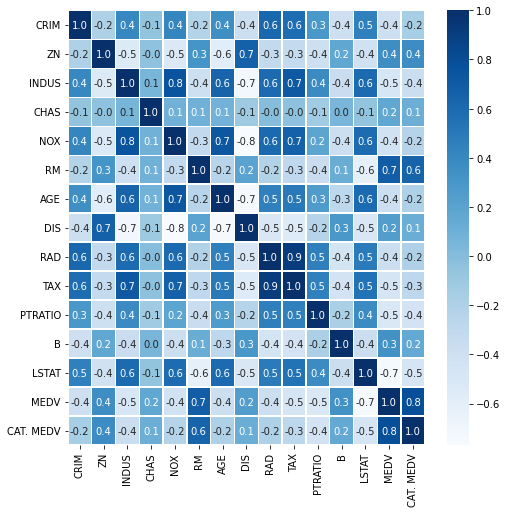

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.1f', linewidths=.5, cmap='Blues')

###결과 : column의 양이 상당하여 전체적인 것을 관측하기 힘들다고 생각한다. 따라서 column들 각각에 대하여 서로 50% 이상의 상관관계가 있는 것들만 출력해보자.

 - 서로 50% 이상의 상관관계가 있는 column을 출력해보자.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
df.corr().CRIM[np.abs(df.corr().CRIM) >= 0.5 ].drop('CRIM')

# CRIM과 상관관계가 높은것은 RAD, TAX 이다.

RAD    0.625505
TAX    0.582764
Name: CRIM, dtype: float64

In [ ]:
df.corr().ZN[np.abs(df.corr().ZN) >= 0.5 ].drop('ZN')

# ZN과 상관관계가 높은것은 INDUS,NOX,AGE,DIS 이다.

INDUS   -0.533828
NOX     -0.516604
AGE     -0.569537
DIS      0.664408
Name: ZN, dtype: float64

 - 위와 동일한 코드를 여러번 작성해야 하므로 함수로 만든다음 좀 더 간단하게 코드를 작성해 보자.

In [ ]:
def check_corr(col):
    return df.corr()[col][np.abs(df.corr()[col]) >= 0.5].drop(col)

for column in df.columns:
    print(check_corr(column))
    print('')

RAD    0.625505
TAX    0.582764
Name: CRIM, dtype: float64

INDUS   -0.533828
NOX     -0.516604
AGE     -0.569537
DIS      0.664408
Name: ZN, dtype: float64

ZN      -0.533828
NOX      0.763651
AGE      0.644779
DIS     -0.708027
RAD      0.595129
TAX      0.720760
LSTAT    0.603800
Name: INDUS, dtype: float64

Series([], Name: CHAS, dtype: float64)

ZN      -0.516604
INDUS    0.763651
AGE      0.731470
DIS     -0.769230
RAD      0.611441
TAX      0.668023
LSTAT    0.590879
Name: NOX, dtype: float64

LSTAT       -0.613808
MEDV         0.695360
CAT. MEDV    0.641265
Name: RM, dtype: float64

ZN      -0.569537
INDUS    0.644779
NOX      0.731470
DIS     -0.747881
TAX      0.506456
LSTAT    0.602339
Name: AGE, dtype: float64

ZN       0.664408
INDUS   -0.708027
NOX     -0.769230
AGE     -0.747881
TAX     -0.534432
Name: DIS, dtype: float64

CRIM     0.625505
INDUS    0.595129
NOX      0.611441
TAX      0.910228
Name: RAD, dtype: float64

CRIM     0.582764
INDUS    0.720760
NOX      0.6680

###결과: 위에서 출력된 결과를 살펴보면 각 column에 대해 상관관계가 높은 column을 관측할 수 있고 이러한 자료가 좀 더 구체적인 데이터 분석을 할 때 도움이 된다고 생각한다.

 - 이제 문제에 해당하는 주택가격(MEDV)와 관련 있는 Factor를 찾아보자.

 위에서 출력한 결과들 중 주택가격(MEDV)에 해당하는 결과를 잠시 살펴보자.
 결과를 보면 방의수(RM), 학생-교사비율(PTRATIO), 하위계층비율(LSTAT)이 주택가격과 50%이상의 상관관계가 있다고 나온다. 그렇지만 단순히 생각했을때 50% 이상은 아니지만 다른 요소들도 주택가격과의 상관관계가 있을것으로 예상되는 요소들이 있으므로 아래의 과제를 수행하며 관측해보자.



# 본격 과제

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평슈
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

## 1. 대형 평수 vs 소형 평수

 - 주어진 데이터 안에서 RM을 통해 대략적인 평수에 대해 알 수 있으므로 RM과 MEDV의 상관관계를 알아보자
 - 두가지 요소모두 수치형 데이터 이므로 산점도를 통해 나타내보자.
 - 그래프에서 해당 산점도를 가장 잘 나타낼 수 있는 직선을 표현해보자.

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/토이프로젝트_0421/BostonHousing.xls')

In [ ]:
print(check_corr('MEDV'))

#MEDV - RM은 69% 이상의 높은 양의 상관관계를 가짐을 알 수 있다.

RM           0.695360
PTRATIO     -0.507787
LSTAT       -0.737663
CAT. MEDV    0.789789
Name: MEDV, dtype: float64


 - 우선 RM과 MEDV에 대해 전체적인 분포를 산점도를 통해 살펴보자

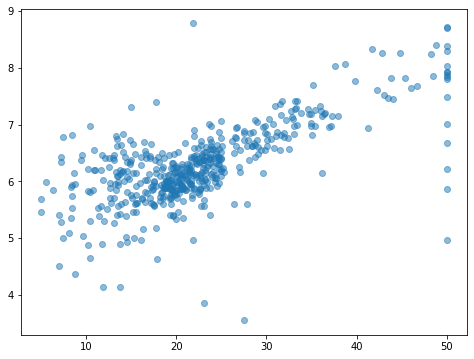

In [ ]:
medv = df.MEDV
rm = df.RM


plt.figure(figsize=(8,6))

plt.scatter(medv, rm, alpha=0.5)

plt.show()

 - 선형적인 구조를 가지고 있음을 관측할 수 있다.
 - 해당 산점도를 가장 잘 나타낼 수 있는 직선으로 표현해보자.

y = a^x + b 의 형태로 표현해보자. (행렬을 이용)

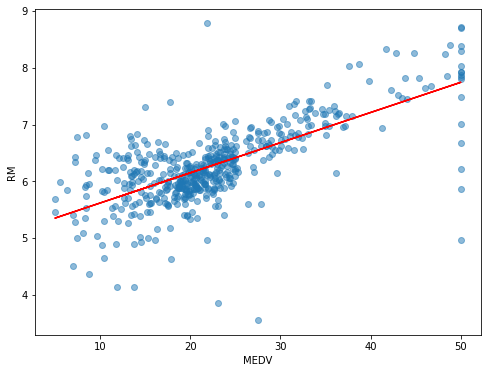

In [ ]:
medv_arr = np.array(medv).reshape(-1, 1)
rm_arr = np.array(rm).reshape(-1, 1)
ones_arr = np.ones(506).reshape(-1, 1)

x = np.hstack([medv_arr, ones_arr])

a, b = np.linalg.pinv(x) @ rm_arr

f = a * medv_arr + b

plt.figure(figsize=(8, 6))

plt.xlabel('MEDV')
plt.ylabel('RM')

plt.scatter(medv, rm, alpha=0.5)
plt.plot(medv_arr, f, color='r')

plt.show()


###결과: 그래프에서 좀 더 직관적으로 관측할 수 있듯이 MEDV와 RM은 양의 상관관계를 가지며 전체적으로 평수가 증가하면 MEDV도 증가함을 알 수 있다. 또한 MEDV가 50정도 되는 곳에서는 평수에 상관없이 MEDV가 고가를 기록하고 있음을 확인 할 수 있다.

## 2. 노후화 정보와 집값의 관계

 - Age - MEDV의 상관관계에 대해 수치적으로 관측해보자.
 - 두 요소 모두 수치형 데이터이기 때문에 산점도를 통해 관측해보자.


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/토이프로젝트_0421/BostonHousing.xls')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [ ]:
print(df.corr()['MEDV'].loc['AGE'])

# 음의 상관관계가 있음을 수치적으로 관측 할 수 있다. (약 38%)

-0.3769545650045961


 : AGE가 나타내는 값이 1940년 이전 건축된 주택 비율이기 때문에 AGE가 높다는 말은 노후화가 많이 된 지역임을 알 수 있다.
 : 즉, 노후화가 많이 된 지역일 수록 주택가격(MEDV)가 낮음을 추측해 볼 수 있다. (음의 상관관계)

 - 산점도를 통해 전체적인 데이터 분포를 살펴보자

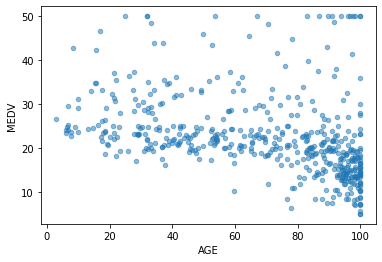

In [ ]:
df.plot.scatter(x='AGE', y='MEDV', alpha=0.5)


: 산점도를 통해 관측 데이터 자체에 노후화 지역이 많이 포함되어 있음을 알 수 있고, 전체적으로 작은 기울기의 반비례 그래프 임을 확인 할 수 있다. 그리고 아웃라이어가 상당 수 존재함도 확인 가능하다. 

 - 해당 그래프로는 뭔가 명확한 상관관계를 관측하기 힘들다고 생각된다. AGE를 범주형 데이터로 변환 후 MEDV의 평균값, 중앙값 등을 비교해 보자.

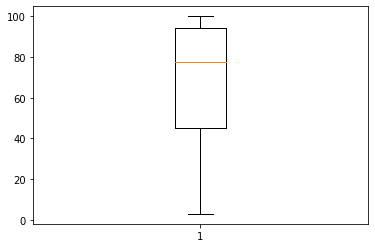

In [ ]:
plt.figure()

plt.boxplot(df['AGE'])

plt.show()

 - AGE를 4분할해서 범주형으로 나타내자.

In [ ]:
age_q_1 = df['AGE'].quantile(.25)
age_q_2 = df['AGE'].quantile(.5)
age_q_3 = df['AGE'].quantile(.75)

def f(x):
    if x < age_q_1:
        return 0
    elif x < age_q_2:
        return 1
    elif x < age_q_3:
        return 2
    else:
        return 3


df['AGE'] = df['AGE'].map(f)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,1,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,2,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,1,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,1,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [ ]:
df['AGE'].value_counts()

3    127
0    127
1    126
2    126
Name: AGE, dtype: int64

In [ ]:
how = {
    'MEDV': np.mean
}

age_medv = df.groupby('AGE').agg(how)
age_medv

,MEDV
AGE,
0,27.080315
1,24.523016
2,21.209524
3,17.323622


 - 범주화된 AGE를 기준으로 MEDV의 평균값을 수치로 비교해보면 AGE(노후화)가 많이 된 지역일 수록 MEDV의 평균이 낮아짐을 알수있다.
 - 해당 테이블을 그래프로 표현해보자

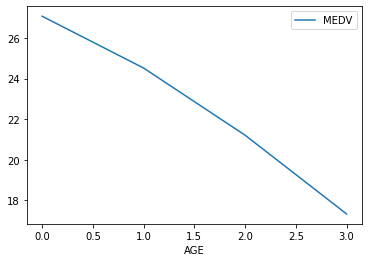

In [ ]:
age_medv.plot()

 ### 결론 : AGE가 증가할수록(노후화가 많이 진행된 지역) 집값의 평균이 감소함을 관측할 수 있다.

## 3. 직주근접

 - DIS 와 MEDV의 비교

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/토이프로젝트_0421/BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [ ]:
df.corr()['MEDV'].loc['DIS']

0.249928734085904

 : 수치적으로는 25%의 양의 상관관계가 있음을 확인 할 수 있다.

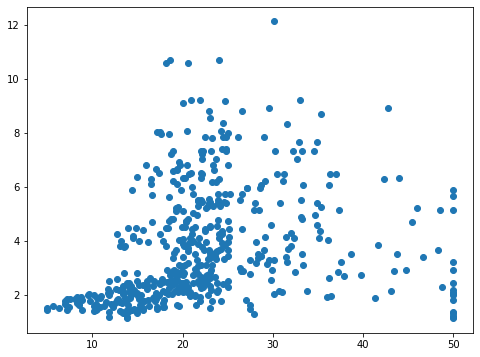

In [ ]:
plt.figure(figsize = (8, 6))

plt.scatter(df['MEDV'], df['DIS'])

plt.show()

 : 산점도를 통해서는 둘의 상관관계를 관측하기 힘들다. 그렇다면 DIS를 범주형 데이터로 변환하여 관측해보자.

In [ ]:
df.head(100)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.12204,0.0,2.89,0,0.445,6.625,57.8,3.4952,2,276,18.0,357.98,6.65,28.4,0
96,0.11504,0.0,2.89,0,0.445,6.163,69.6,3.4952,2,276,18.0,391.83,11.34,21.4,0
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7,1
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,1


 - 각 quantile을 기준으로 DIS 데이터를 4분할해보자. (데이터의 고른 분배를 위해 quantile을 기준으로 분할함.)

In [ ]:
q_1 = df['DIS'].quantile(.25)
q_2 = df['DIS'].quantile(.50)
q_3 = df['DIS'].quantile(.75)
print(q_1, q_2, q_3)

2.100175 3.2074499999999997 5.1884250000000005


In [ ]:
def f(x):
    if x < q_1:
        return 0
    elif x < q_2:
        return 1
    elif x < q_3:
        return 2
    else:
        return 3

df['DIS'] = df['DIS'].map(f)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,2,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,2,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,2,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,3,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,3,3,222,18.7,396.90,5.33,36.2,1


In [ ]:
how = {
    'MEDV': [np.mean, np.median, np.var, np.std]
}

df.groupby('DIS').agg(how)

MEDV                              
          mean median         var        std
DIS                                         
0    17.552756  14.40  121.749973  11.034037
1    22.522222  20.25   71.730862   8.469407
2    24.880159  23.10   60.425603   7.773391
3    25.194488  23.40   48.511954   6.965052

 : DIS가 증가할 수록 MEDV의 평균값도 증가함을 수치로 확인 할 수 있다.

In [ ]:
df['DIS'].value_counts()

3    127
0    127
2    126
1    126
Name: DIS, dtype: int64

          MEDV
DIS           
0    17.552756
1    22.522222
2    24.880159
3    25.194488


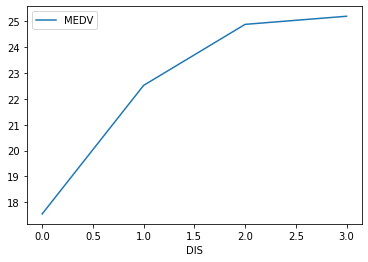

In [ ]:
how_2 = {
    'MEDV': np.mean
}


print(df.groupby('DIS').agg(how_2))
df.groupby('DIS').agg(how_2).plot()

###결과 : 해당 그래프와 표를 관측한 결과, DIS의 수치가 가장 낮은 범주 '0'인 곳에서 주택가격이 상대적으로 낮게 관측되고 그것보다 인접성이 높은 1, 2, 3으로 갈수록 높아지는 양상을 가지는 것을 알 수 있다. 

 - DIS 와 CAT. MEDV를 비교해서 직장인접성에 따른 고가주택 비율을 알아보자.

     CAT. MEDV
DIS           
0     0.110236
1     0.126984
2     0.206349
3     0.220472


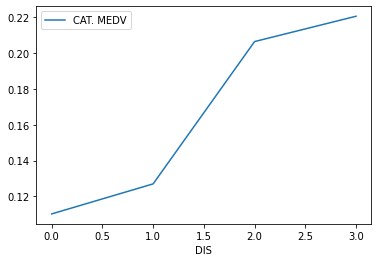

In [ ]:
# 둘다 범주형으로 비교

how = {
    'CAT. MEDV': np.mean
}

print(df.groupby('DIS').agg(how))

df.groupby('DIS').agg(how).plot()

###결과: 둘 다 범주형으로 비교했을 시 직장인접 지역일수록 고가 주택의 비율이 높은것을 명확하게 관측 가능하다. 

## 4. 찰스강뷰

 - CHAS - MEDV의 상관관계 (수치적표현)
 - CHAS은 범주형 데이터이므로 1에 해당하는 평균 주택가격 과 0에 해당하는 평균 주택가격을 비교함으로써 의미있는 데이터 분석을 할 수 있다. (평균, 중앙값, 표준편차, 분산, 박스 플롯으로 비교해보자.)
 - CHAS값을 양분화 한 다음 각각의 주택가격 분포를 비교해보자.
 - CHAS와 범주화된 CAT. MEDV도 비교해보자 (강의 인접여부에 따라 고가의 주택이 어디 많이 분포하는지)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/토이프로젝트_0421/BostonHousing.xls')

In [ ]:
print(df.corr()['MEDV']['CHAS'])

0.17526017719029868


: 수치적으로는 17%의 양의 상관관계가 있는것으로 관측된다.

In [ ]:
print(df['MEDV'][df['CHAS'] == 1].mean())
print(df['MEDV'][df['CHAS'] == 0].mean())

28.44
22.093842887473482


In [ ]:
how = {
    'MEDV': [np.mean, np.median, np.std]
}


df.groupby('CHAS').agg(how)

MEDV                  
           mean median        std
CHAS                             
0     22.093843   20.9   8.831362
1     28.440000   23.3  11.816643

: 평균값을 수치로 비교 했을때 찰스강경계 지역의 MEDV 평균이 높은것을 알수 있다. 하지만 표준편차를 봤을때 좀더 세분화된 관측이 필요해 보인다.

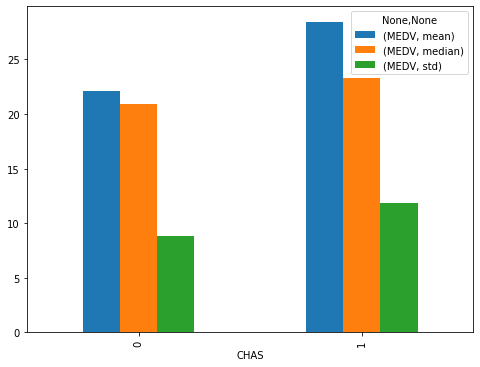

In [ ]:
df.groupby('CHAS').agg(how).plot.bar(figsize=(8, 6))

: 1(강 경계지역), 0(경계가 아닌 지역)을 비교해서 관측해 보았을때 1에서 주택가격(MEDV)의 평균이 높게 나타나고, 표준편차를 보았을때 1에서 주택가격(MEDV)의 분포가 더 넚게 나타남을 알 수 있다. 즉, 1이 0 보다 가격의 변동폭이 더 크고, 전체 데이터의 평균과 중앙값은 1이 더 높다는것을 관측할 수 있다. 

 - boxplot을 활용해 강경계와 아닌지역의 MEDV값에대한 분포를 알아보자.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


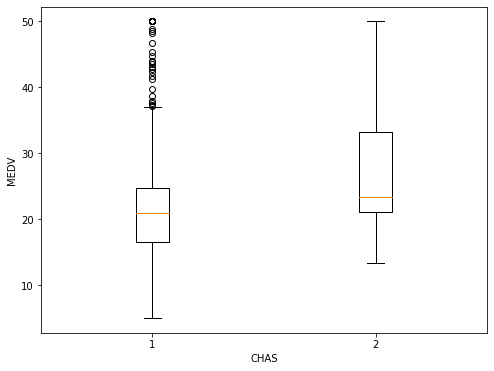

In [ ]:
# df['MEDV'][df['CHAS'] == 1].plot.scatter()

plt.figure(figsize = (8, 6))

plt.boxplot([np.array(df['MEDV'][df['CHAS'] == 0]), np.array(df['MEDV'][df['CHAS'] == 1])])

plt.xlabel('CHAS')
plt.ylabel('MEDV')

plt.show()

: boxplot으로 관측해보면 두가지 경우를 좀 더 명확하게 비교할 수 있다.
경계지역(CHAS = 1)의 경우 아웃라이어가 많이 분포 함을 확인 할수 있다.
전반적으로는 경계가 아닌 지역이 경계지역에 비해서 전체 주택가격의 1사분위수와 3사분위수가 높은것을 확인 할 수 있다. 즉, 해당 자료를 가지고 강의 경계같은경우 MEDV의 분포가 상대적으로 안정되있고 그에비해 강의 경계가 아닌지역은 MEDV의 분포가 불안정(들쭉날쭉)함을 알수 있다.

 - 이번에는 CHAS와 CAT. MEDV의 관계를 비교해보자 (둘 다 범주형) : 고가주택의 비율이 어느쪽이 더 높은지.

In [ ]:
mean_high = df['CAT. MEDV'].mean() # 전체 주택가격중 고가주택이 얼마나 포함됬는지의 비율. 17%정도가 고가다.


how = {
    'CAT. MEDV': np.sum
}

df.groupby('CHAS').agg(how)

,CAT. MEDV
CHAS,
0,73
1,11


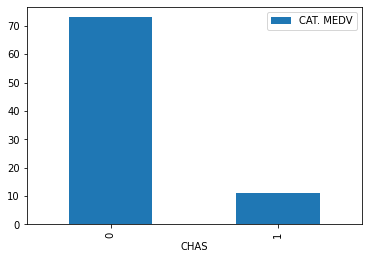

In [ ]:
df.groupby('CHAS').agg(how).plot.bar()

해당 데이터를 본다면 강에서 조금떨어진 지역에 고가의 주택이 더 많이 분포함을 알 수 있다.

###결과 : 마지막으로 종합적으로 데이터를 분석해 본다면, 초기단계에서는 강의 경계지역과 아닌지역의 가격 평균이 비슷해 두 영역에 대해 비교하기 애매하지만, boxplot을 통해 관측해 본다면 아웃라이어에 영향이 큰 것을 알 수 있다. (아웃라이어를 제외하고 본다면 강의경계지역의 MEDV가 더 높게 관측된다.) 또한 가격을 범주화해 비교하면 경계가 아닌 지역에 고가의 주택이 많이 위치해 있음을 명확히 알 수 있다.

###경계가 아닌지역에 고가주택 비율이 더 높지만 경계지역의 평균적인 MEDV가 높음을 알 수 있다.

## 5. DIS, RM과 MEDV의 상관관계

 - 직장이 가까우면서 소형 평수인 부동산의 가격은?
 - 좀 더 직관적인 관측을 위해 DIS와 RM을 범주형 데이터로 바꾼다음 관측해보자

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/토이프로젝트_0421/BostonHousing.xls')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


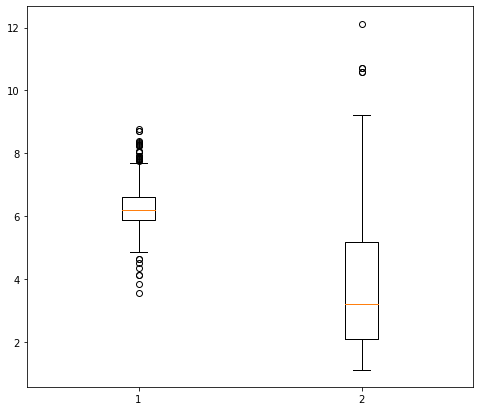

In [ ]:
plt.figure(figsize = (8, 7))

plt.boxplot([df['RM'], df['DIS']])

plt.show()

 : RM과 DIS를 boxplot으로 관측했을때 RM이 DIS에 비해 좀더 Q2를 중심으로 고르게 분포되어 있으므로, 범주화 시 RM은 양분화, DIS는 삼분할 해서 관측해보자.

In [ ]:
rm_mid = df['RM'].quantile(.5)

def g(x):
    if x < rm_mid:
        return 0
    else:
        return 1


df['RM'] = df['RM'].map(g)


In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,1,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,1,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,1,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,1,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,1,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


RM 0 : 소형 평수/ 1: 중형, 대형

In [ ]:
dis_1 = df['DIS'].quantile(.3)
dis_2 = df['DIS'].quantile(.6)

def t(x):
    if x < dis_1:
        return 0
    elif x < dis_2:
        return 1
    else:
        return 2

df['DIS'] = df['DIS'].map(t)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,1,65.2,2,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,1,78.9,2,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,1,61.1,2,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,1,45.8,2,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,1,54.2,2,3,222,18.7,396.90,5.33,36.2,1


RM은 2분할, DIS는 3분할해서 범주형으로 나타냄. (DIS: 클수록 인접성이 높음.)

CAT. MEDV의 평균은 고가주택 비율이 된다. RM, DIS에 따른 고가 주택비율을 pivot_table로 만들어 관측해보자.

In [ ]:
piv_table = pd.pivot_table(data=df, index=['RM', 'DIS'], values='CAT. MEDV', aggfunc='mean')
piv_table

CAT. MEDV
RM DIS           
0  0     0.021277
   1     0.014085
   2     0.000000
1  0     0.275862
   1     0.287500
   2     0.365217

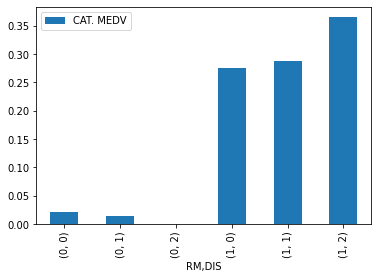

In [ ]:
piv_table.plot.bar()

RM, DIS, CAT. MEDV 모든 데이터를 범주형으로 바꾸고 관측하였을때, 집의 평수에 따라서 고가주택의 비율이 크게 나뉘는것을 볼수 있다. (소형 평수의 경우 고가 주택이 거의 없다.)
중, 대형 주택의 경우 인접성이 클수록 고가주택 비율이 상승함을 알 수 있다.

 - 두번째로 DIS, RM에 따른 MEDV의 평균을 확인해보자.

In [ ]:
piv_table_2 = pd.pivot_table(data=df, index=['DIS', 'RM'], values='MEDV', aggfunc='mean')
piv_table_2

MEDV
DIS RM           
0   0   15.188298
    1   22.915517
1   0   20.228169
    1   27.328750
2   0   19.747727
    1   28.560870

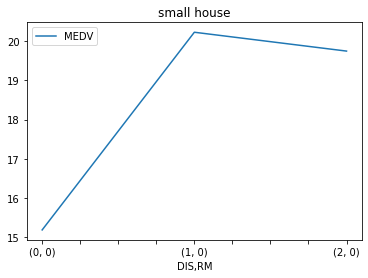

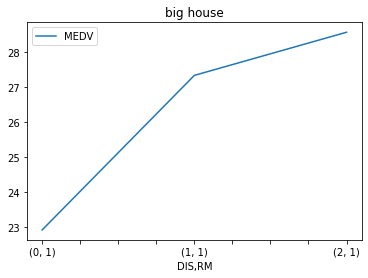

In [ ]:
how_5 = {
    'MEDV': np.mean
}

df.groupby(['DIS', 'RM']).agg(how_5).loc[[[0, 0], [1, 0], [2, 0]]].plot(title = 'small house') # 소형 평수, 거리 변화에 따른 주택가격평균값 변동
df.groupby(['DIS', 'RM']).agg(how_5).loc[[[0, 1], [1, 1], [2, 1]]].plot(title = 'big house') # 대형 평수, 거리 변화에 따른 주택가격평균값 변동.

###결과 : 대형 평수의 경우 직장 인접성이 높을수록 주택가격이 증가하는 경향이 명확하게 나타난다. 소형 평수의 경우 직장 인접성이 가장 높은 범주 보다는 중간지역에서의 주택가격이 가장 높음을 알 수 있다.


 - 동시에 한 그래프로 표현해서 비교해보자.

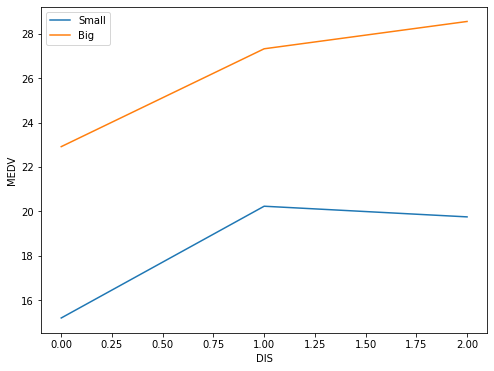

In [ ]:
plt.figure(figsize = (8, 6))

plt.xlabel('DIS')
plt.ylabel('MEDV')

plt.plot(np.array(df.groupby(['DIS', 'RM']).agg(how_5).loc[[[0, 0], [1, 0], [2, 0]]]), label='Small')
plt.plot(np.array(df.groupby(['DIS', 'RM']).agg(how_5).loc[[[0, 1], [1, 1], [2, 1]]]), label='Big')
plt.legend()

plt.show()


 : 두 자료의 차이와 변동을 좀 더 명확하게 비교 할 수 있다.


 - 번외로 위의 데이터에서 보았을 때 소형주택의 경우 인접성이 증가할 수록 고가주택의 비율이 낮아진다.
 - 대형주택의 경우 인접성이 증가할수록 고가주택의 비율이 높아진다.

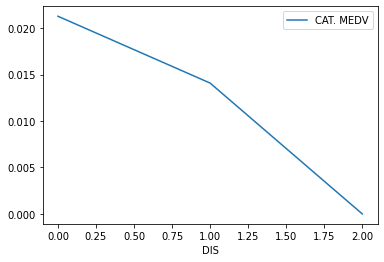

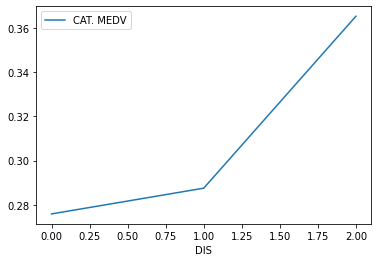

In [ ]:
piv_table.loc[0].plot()
piv_table.loc[1].plot()

 - 좀 더 보기 쉽게 표현 subplot 활용

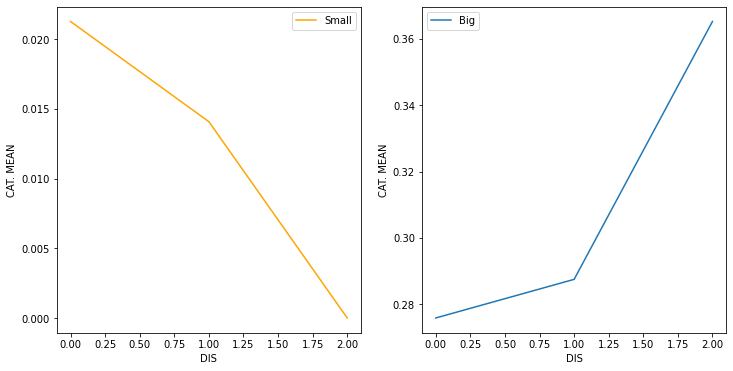

In [ ]:
plt.figure(figsize = (12, 6))

plt.subplot(1,2,1)
plt.xlabel('DIS')
plt.ylabel('CAT. MEAN')
plt.plot(piv_table.loc[0], color='orange', label='Small')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('DIS')
plt.ylabel('CAT. MEAN')
plt.plot(piv_table.loc[1], label='Big')
plt.legend()

plt.show()

###결과 : 소형주택의 경우 직장 인접성이 증가할 수록 고가 주택 비율이 감소한다. 대형주택의 경우 직장 인접성이 증가할수록 고가 주택 비율이 증가한다.

## 채점기준

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>